In [1]:
import tensorflow as tf

tf.__version__

'2.2.0-rc4'

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
def metrics(y_test, y_pred):
    y_pred = y_pred.argmax(axis=1)
    print(y_pred)
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("Precision Score : ", precision_score(y_test, y_pred, average="weighted"))
    print("Classification Report : \n", classification_report(y_test, y_pred))
    print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

In [3]:
import pandas as pd
import numpy as np

<hr>

## Load the data

<hr>

In [4]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Always a good idea to look at shape before getting started.
print(f"X train shape : {X_train.shape}")
print(f"y train shape : {y_train.shape}")
print(f"X test shape : {X_test.shape}")
print(f"y test shape : {y_test.shape}")

X train shape : (60000, 28, 28)
y train shape : (60000,)
X test shape : (10000, 28, 28)
y test shape : (10000,)


##### Now, if we see training set contains 60000 samples. 
##### Testing set has 10000. 
##### As shape of each image is 28 * 28 pixels (picture element) --> can be interpreted as grayscale as no color layer is specified.

##### In grayscale 255 --> white , 0 --> black and any other value --> shade of grey.

In [5]:
# All of the above are numpy arrays --> run much faster than python lists.
# numpy is implemented in C.

# tensorflow is named after "tensor" which is a generalised numpy array.

print(type(X_train))

<class 'numpy.ndarray'>


In [6]:
# Normalising values as gradient descent works better on small scale data.

X_train , X_test = X_train/255, X_test/255

<hr>

## Instantiate the model

<hr>

In [7]:
X_train[0].shape

(28, 28)

In [8]:
len(set(y_train))

10

In [9]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model

input_shape = X_train[0].shape
hidden_units = 128
K = len(set(y_train))


i = Input(shape=input_shape)
x = SimpleRNN(hidden_units)(i)
x = Dense(K, activation="softmax")(x)

rnn_model = Model(i,x)

In [10]:
from tensorflow.keras.layers import Input, GRU, Dense
from tensorflow.keras.models import Model

input_shape = X_train[0].shape
hidden_units = 128
K = len(set(y_train))


i = Input(shape=input_shape)
x = GRU(hidden_units)(i)
x = Dense(K, activation="softmax")(x)

gru_model = Model(i,x)

In [11]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

input_shape = X_train[0].shape
hidden_units = 128
K = len(set(y_train))


i = Input(shape=input_shape)
x = LSTM(hidden_units)(i)
x = Dense(K, activation="softmax")(x)

lstm_model = Model(i,x)

In [12]:
import matplotlib.pyplot as plt
def compile_model(model):
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
    
    plt.subplot(211)
    plt.plot(r.history["loss"], label="Loss")
    plt.plot(r.history["val_loss"], label="Val. Loss")
    plt.xlabel('No. of epochs')
    plt.ylabel("Loss")
    plt.legend()
    
    plt.subplot(212)
    plt.plot(r.history["accuracy"], label="Accuracy")
    plt.plot(r.history["val_accuracy"], label="Val. Accuracy")
    plt.xlabel('No. of epochs')
    plt.ylabel("Accuracy")
    plt.legend()
    
    y_pred = model.predict(X_test)
    metrics(y_test, y_pred)
    

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3850 - accuracy: 0.8852 - val_loss: 0.2243 - val_accuracy: 0.9341
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2029 - accuracy: 0.9421 - val_loss: 0.1594 - val_accuracy: 0.9522
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1662 - accuracy: 0.9517 - val_loss: 0.1630 - val_accuracy: 0.9525
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1596 - accuracy: 0.9552 - val_loss: 0.1354 - val_accuracy: 0.9600
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1578 - accuracy: 0.9545 - val_loss: 0.1606 - val_accuracy: 0.9569
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1348 - accuracy: 0.9616 - val_loss: 0.1305 - val_accuracy: 0.9643
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1502 - accuracy: 0.9577 - val_loss: 0.1601 - val_accuracy:

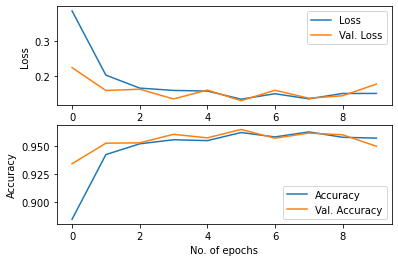

In [13]:
compile_model(rnn_model)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3371 - accuracy: 0.8905 - val_loss: 0.1283 - val_accuracy: 0.9596
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0924 - accuracy: 0.9716 - val_loss: 0.0882 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0615 - accuracy: 0.9811 - val_loss: 0.0670 - val_accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0522 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0477 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0503 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0453 - val_a

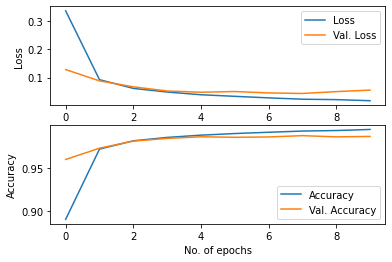

In [14]:
compile_model(gru_model)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.3238 - accuracy: 0.8968 - val_loss: 0.1315 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1036 - accuracy: 0.9687 - val_loss: 0.0811 - val_accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0717 - accuracy: 0.9781 - val_loss: 0.0610 - val_accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0558 - accuracy: 0.9837 - val_loss: 0.0574 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0535 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0617 - val_accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0401 -

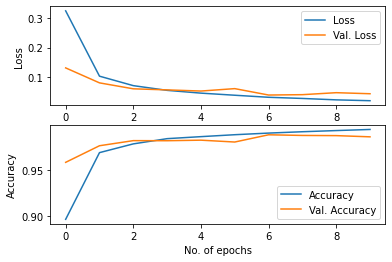

In [15]:
compile_model(lstm_model)